In [1]:
import os
import json

import torch
import result
from rnn_model import LSTMNet, GRUNet
from utils import DotDict, Logger, rmse, rmse_tensor, boolean_string, get_dir, get_time, next_dir, model_dir, get_model
from get_dataset import get_time_data, get_stnn_data
from stnn import SaptioTemporalNN
import matplotlib.pyplot as plt
from matplotlib import axis
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
%matplotlib inline


In [2]:
%load_ext autoreload
%autoreload 1
%aimport result

## Data

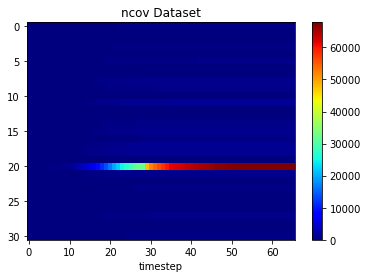

In [3]:
datadir = 'data'
dataset = 'ncov_confirmed'
data = get_time_data(datadir, dataset)

plt.figure('ncov Dataset')
plt.imshow(data.squeeze().numpy().T, aspect='auto', cmap='jet')
plt.title('ncov Dataset')
plt.xlabel('timestep')
plt.colorbar()

## Model List

In [4]:
pred_all = {}

In [5]:
folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output', 'algorithm'))

In [6]:
stnn = result.Printer(folder)
stnn.get_df(mean=True, min=True)
stnn.min_idx()

the df is :
                           test_loss  train_loss  nhid  nlayers
Adagrad_50_21-03-21-03-13   0.268504    0.260233     0        1
Adam_50_21-05-21-03-29      0.044544    0.005436     0        1
Rmsprop_50_21-04-21-03-35   0.041914    0.010461     0        1
SGD_50_21-04-21-03-22       0.053854    0.062793     0        1


'Rmsprop_50_21-04-21-03-35'

## Exp 

In [8]:
exps_dir = {}

In [19]:
algorithms = os.listdir(folder)
for algorithm in algorithms:
    exps_dir[algorithm.split('_')[0]] = algorithm
exps_dir

{'Adagrad': 'Adagrad_50_21-03-21-03-13',
 'Adam': 'Adam_50_21-05-21-03-29',
 'Rmsprop': 'Rmsprop_50_21-04-21-03-35',
 'SGD': 'SGD_50_21-04-21-03-22'}

In [20]:
for k, v in exps_dir.items():
    exp = result.Exp(v, folder)
    exps_dir[k] = exp.train_loss()

d:\Jupyter_Documents\ML-code\research_code\output\algorithm
Adagrad_50_21-03-21-03-13
d:\Jupyter_Documents\ML-code\research_code\output\algorithm
Adam_50_21-05-21-03-29
d:\Jupyter_Documents\ML-code\research_code\output\algorithm
Rmsprop_50_21-04-21-03-35
d:\Jupyter_Documents\ML-code\research_code\output\algorithm
SGD_50_21-04-21-03-22


In [24]:
x = range(len(exps_dir['Adagrad']))
x

range(0, 100000)

Text(0, 0.5, 'loss')

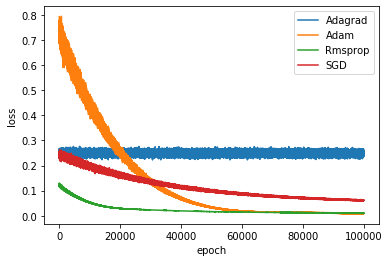

In [23]:
for exp_name, loss in exps_dir.items():
    plt.plot(x, loss[0:100000], label=exp_name)
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')

# Norm

In [30]:
folder_norm = os.path.abspath(os.path.join(os.getcwd(), '..', 'output', 'norm'))
norm_result = result.Printer(folder_norm)
norm_result.get_df(mean=True, min=True)
norm_result.min_idx()

the df is :
                         test_loss  train_loss  nhid  nlayers
norm_all_16-26-21-03-29   0.033676    0.001610     0        1
norm_all_16-48-22-03-38   0.043649    0.008855     0        1
norm_row_16-21-21-03-16   0.033745    0.002906     0        1
norm_row_16-38-22-03-07   0.042244    0.010890     0        1


'norm_all_16-26-21-03-29'

# Model

In [48]:
folder_model = os.path.abspath(os.path.join(os.getcwd(), '..', 'output', 'model'))
model_result = result.Printer(folder_model)
model_result.get_df(mean=True, min=True)
model_result.min_idx()

the df is :
                             test_loss  train_loss  nhid  nlayers
50_default_17-43-23-03-29     0.011062    0.001212    50        4
50_default_17-47-23-03-07     0.008715    0.001394    50        3
50_discover_19-23-23-03-00    0.007851    0.001204    50        4
50_refine_17-45-23-03-03      0.008564    0.001662    50        4
50_refine_17-48-23-03-14      0.008944    0.000653    50        3
GRU_default_16-47-23-03-24    0.007103    0.001018    50        4
GRU_discover_19-21-23-03-36   0.009565    0.000928    50        4
GRU_discover_19-23-23-03-19   0.008746    0.001307    50        3
GRU_refine_16-48-23-03-50     0.034532    0.002557    50        4
LSTM_default_16-47-23-03-24   0.025280    0.001788    50        4


'GRU_default_16-47-23-03-24'

In [33]:
exp_GRU = result.Exp('GRU_default_16-47-23-03-24', folder_model)

d:\Jupyter_Documents\ML-code\research_code\output\model
GRU_default_16-47-23-03-24


In [49]:
pred_GRU = exp_GRU.pred().numpy().T

config.json
logs.json
model.pt
pred_000.txt
true_pred_000.txt


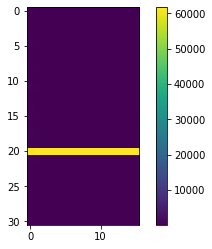

In [50]:
plt.imshow(pred_GRU)
plt.colorbar()

In [52]:
pred_GRU.T

array([[  382.99487305,   271.88574219,   247.3515625 ,   391.98254395,
          260.09790039,   493.85791016,   255.29370117,   264.10095215,
          651.19061279,   499.39538574,   243.53112793,   821.65386963,
          304.01000977,   255.66345215,   532.92700195,   613.36651611,
          351.73632812,   767.3604126 ,   747.07305908,   278.40856934,
        61028.8671875 ,   673.69683838,   263.89147949,   359.73486328,
          245.41015625,   269.35473633,   312.05847168,   462.56347656,
          388.95214844,   198.96691895,   424.9654541 ],
       [  334.33886719,   278.73596191,   266.44433594,   338.87768555,
          272.83007812,   389.89099121,   270.4276123 ,   274.84057617,
          468.46716309,   392.53979492,   264.53564453,   553.72973633,
          294.82116699,   270.56335449,   409.29345703,   449.55078125,
          318.81103516,   526.58154297,   516.43493652,   281.99865723,
        61527.734375  ,   479.61853027,   274.73693848,   322.78491211,
       

config.json
logs.json
model.pt
pred_000.txt
true_pred_000.txt


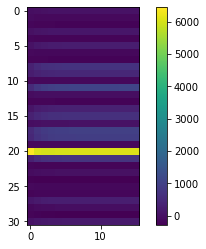

In [44]:
test_data = data[-16:].squeeze().numpy().T
plt.imshow(test_data - exp_GRU.pred().numpy().T)
plt.colorbar()

([<matplotlib.axis.XTick at 0x21b06a6f3c8>],
 <a list of 1 Text xticklabel objects>)

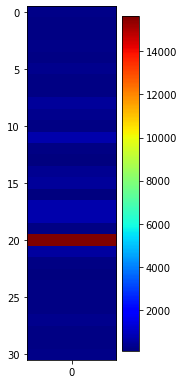

In [40]:
plt.figure(figsize=(2,6.5))
plt.imshow(pred, aspect='auto', cmap='jet')
plt.colorbar()
my_x_ticks = np.arange(0, 1, 1)
plt.xticks(my_x_ticks)

In [81]:
test_data = data[15:].squeeze().numpy().T

In [82]:
test_data.shape

(31, 11)

In [76]:
pred_all['stnn-d'].shape

(31, 11)

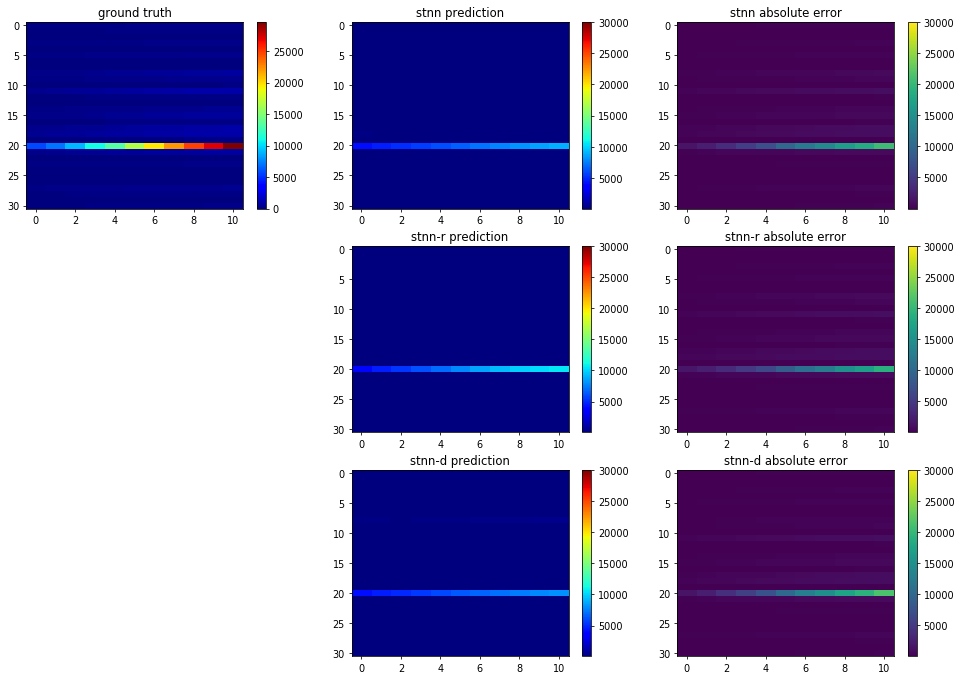

In [99]:
plt.figure('Results', figsize=(17, 12), dpi=70)

plt.subplot(3, 3, 1)
plt.imshow(test_data, aspect='auto', cmap='jet')
plt.colorbar()
plt.title('ground truth')

for i, exp in enumerate(pred_all):
    plt.subplot(3, 3, i * 3 + 2 + i // 3)
    plt.imshow(pred_all[exp], aspect='auto', cmap='jet', vmax=30000)
    plt.colorbar()
    plt.title('{} prediction'.format(exp))

    plt.subplot(3, 3, i * 3 + 3 + i // 3)
    plt.imshow(np.abs(test_data - pred_all[exp]), aspect='auto', vmax=30000)
    plt.colorbar()
    plt.title('{} absolute error'.format(exp))

In [13]:
for name, params in exp.model().named_parameters():
    print(name, params)

factors Parameter containing:
tensor([[[ 0.0099],
         [ 0.0249],
         [ 0.0392],
         ...,
         [ 0.0437],
         [-0.0005],
         [ 0.0444]],

        [[ 0.0772],
         [ 0.1556],
         [ 0.1037],
         ...,
         [ 0.1287],
         [ 0.0983],
         [ 0.0770]],

        [[ 0.0647],
         [ 0.1048],
         [ 0.1077],
         ...,
         [ 0.1034],
         [ 0.1033],
         [ 0.0688]],

        ...,

        [[ 0.0883],
         [ 0.0926],
         [ 0.1002],
         ...,
         [ 0.0303],
         [ 0.1118],
         [ 0.0669]],

        [[ 0.0490],
         [ 0.0659],
         [ 0.0504],
         ...,
         [ 0.0868],
         [ 0.0484],
         [ 0.0831]],

        [[ 0.1118],
         [ 0.0729],
         [ 0.0642],
         ...,
         [-0.0198],
         [ 0.0960],
         [ 0.0166]]], requires_grad=True)
dynamic.module.weight Parameter containing:
tensor([[-0.9505, -0.0173]], requires_grad=True)
dynamic.module.bias Paramet

In [ ]:
exp

## Aids LSTM

In [8]:
folder_name = 'aids_LSTM'
model_name = get_model(folder_name)[1]
model_list = model_dir[folder_name]

### The Best Model 

In [ ]:
for model in model_list:
    model = LSTMNet()

In [5]:
outputdir = 'output'
exps = ['stnn']
models = {}
for exp in exps:
    with open(os.path.join(outputdir, exp, 'config.json'), 'r') as f:
        config = json.load(f)
    setup, (train_input, train_output), (test_input, test_data)  = dataset_factory(datadir, dataset, 700, 5)
    model = rnn(29, config['nhid'], config['nlayers'], 29, config['seq_length'])
    state_dict = torch.load(os.path.join(outputdir, exp, 'model.pt'), map_location=lambda storage, loc: storage)
    model.load_state_dict(state_dict)
    models[exp] = model

## Results

In [6]:
predictions = {}
for exp in exps:
    model = models[exp]
    model.eval()
    with torch.no_grad():
        prediction = model.generate(test_input, 396)
        predictions[exp] = prediction
        mse =  rmse(prediction, test_data)
        print(prediction.size())
    print('RMSE {}:\t'.format(exp), mse)

torch.Size([396, 29, 1])
RMSE stnn:	 9.350045204162598


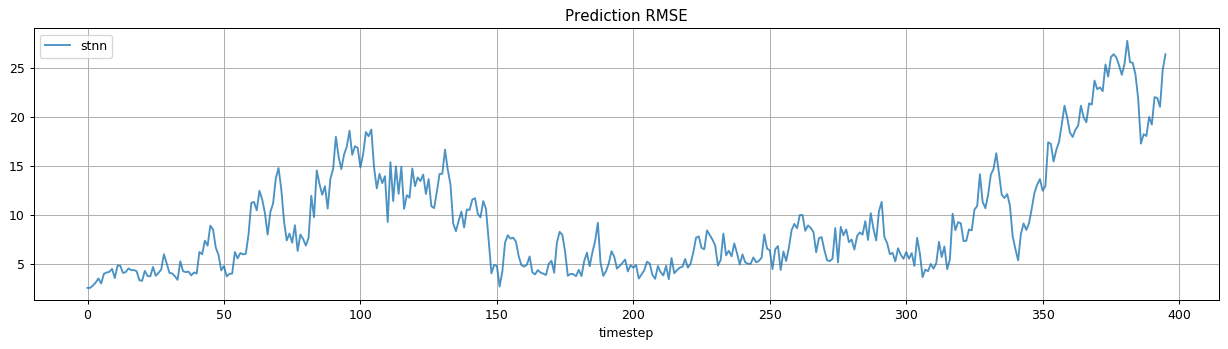

In [7]:
plt.figure('Test plots', figsize=(17, 4), dpi=90)
for exp in exps:
    with open(os.path.join(outputdir, exp, 'logs.json'), 'r') as f:
        logs = json.load(f)

    plt.plot([logs['test_epoch.ts.{}.rmse'.format(ts)][-1] for ts in range(396)], label=exp, alpha=0.8)

plt.grid()
plt.title('Prediction RMSE')
plt.xlabel('timestep')
plt.legend()

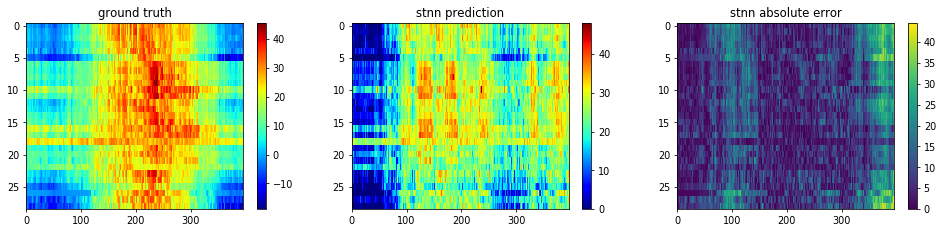

In [8]:
plt.figure('Results', figsize=(17, 12), dpi=70)

plt.subplot(3, 3, 1)
plt.imshow(test_data.squeeze().numpy().T, aspect='auto', cmap='jet')
plt.colorbar()
plt.title('ground truth')

for i, exp in enumerate(exps):
    plt.subplot(3, 3, i * 3 + 2 + i // 3)
    plt.imshow(predictions[exp].squeeze().numpy().T, aspect='auto', cmap='jet')
    plt.colorbar()
    plt.title('{} prediction'.format(exp))

    plt.subplot(3, 3, i * 3 + 3 + i // 3)
    plt.imshow(test_data.sub(predictions[exp]).abs().squeeze().numpy().T, aspect='auto')
    plt.colorbar()
    plt.title('{} absolute error'.format(exp))